In [4]:
import os
os.chdir('/home/gauravk/Documents/DataScience/Datasets/K_russian/')

In [2]:
#importing libraries
import pandas as pd
import sklearn
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns
from IPython.display import clear_output #for clearing the output of the cell on each iteration of for loop showing only latest output

In [5]:
train = pd.read_csv("train.csv")

In [6]:
train.shape

(30471, 292)

In [7]:
len(train.columns)

292

In [5]:
selected_columns = []
removed_columns = []

In [7]:
for i in train.columns:
    clear_output()
    print(i)
    print("Head:")
    print(train[[i]].head())
    print("Unique Values:")
    print(train[i].value_counts())
    print(train[i].dtype)
    print("select this column "+i+" : Y/N ?")
    a = input()
    if(a == "Y" or a =="y"): 
        selected_columns.append(i)
    else: 
        removed_columns.append(i)

price_doc
Head:
   price_doc
0    5850000
1    6000000
2    5700000
3   13100000
4   16331452
Unique Values:
2000000     757
1000000     747
6000000     372
3000000     332
6500000     330
7000000     319
5500000     309
6300000     295
5000000     294
6200000     277
7500000     276
6400000     235
6800000     231
8500000     231
8000000     228
6100000     220
5900000     208
5800000     208
5700000     203
7200000     201
5300000     197
6900000     191
6600000     190
6700000     189
9000000     186
5200000     186
5600000     185
7400000     181
5400000     172
7300000     158
           ... 
6066060       1
8786200       1
7680172       1
4870320       1
12470451      1
8386741       1
5978048       1
10432700      1
5644478       1
3985600       1
7181600       1
7299270       1
3798080       1
6238400       1
6881498       1
5519581       1
10100958      1
11620576      1
6744295       1
6689000       1
6303980       1
12132590      1
6177010       1
3369207       1
5804280    

## dropping some columns

listing them as follows, check back here later: :'(

In [8]:
selected_columns = ['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m','price_doc']

In [ ]:
removed_columns

## Exploring the selected columns

duh

In [10]:
for i in selected_columns:
#     clear_output()
#     print("Head :")
#     print(train[i].head())
    print("Type : "+i,train[i].dtype)
#     print("Unique values : ", train[i].value_counts())
#     print("Number of unique values : ", train[i].value_counts().shape)
#     print("Number of NaNs : ", train[i].isnull().sum())
    #add this data to a list
    #print number of unique values
#     print(i)
#     i = input()

Type : id int64
Type : timestamp object
Type : full_sq int64
Type : life_sq float64
Type : floor float64
Type : max_floor float64
Type : material float64
Type : build_year float64
Type : num_room float64
Type : kitch_sq float64
Type : state float64
Type : product_type object
Type : sub_area object
Type : area_m float64
Type : price_doc int64


In [14]:
train_selected = train[selected_columns]

In [ ]:
train_selected.dtypes

In [15]:
objects = ['sub_area','product_type']
#no Nans here we can simply proceed with Label Encoding these.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in objects:
    train_selected[i] = le.fit_transform(train_selected[i])

/home/gauravk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
train_selected.shape

(30471, 15)

In [18]:
train_selected = train_selected.dropna()

In [19]:
train_selected.shape

(14816, 15)

In [27]:
predictors = train_selected[train_selected.columns[2:-1]]
response = train_selected[train_selected.columns[-1]]

In [28]:
print(predictors.dtypes)
response.dtypes


full_sq           int64
life_sq         float64
floor           float64
max_floor       float64
material        float64
build_year      float64
num_room        float64
kitch_sq        float64
state           float64
product_type      int64
sub_area          int64
area_m          float64
dtype: object


dtype('int64')

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, response, test_size=0.4, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
#fucking shit ignore this cell
parameters = {'max_depth':list(range(1, 100)), 'splitter':['best', 'random'], 'min_samples_split':list(range(2,20)), 'min_impurity_split':np.power(10,np.array(range(-10, 2), dtype=np.float64)) }
dtr = DecisionTreeRegressor()
lr = GridSearchCV(dtr, parameters)
lr.fit(dropped_train, dropped.price_doc)
y_pred_train = lr.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred = lr.predict(X_test)
y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
# print(np.log(y_pred_train+1))
# a = y_pred>0
# print(len(a))
# print(a.sum())
# print(np.all(np.isfinite(np.log(y_pred_train+1))))
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(y_train+1))))
print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

In [ ]:
lr.best_score_

In [ ]:
lr.best_estimator_

In [31]:
lr.best_estimator_ #best #random

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [35]:
lr.

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_split=9.9999999999999995e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [34]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth':list(range(1, 100)), 'splitter':['best', 'random'], 'min_samples_split':list(range(2,20)), 'min_impurity_split':np.power(10,np.array(range(-10, 2), dtype=np.float64)) }
dtr = DecisionTreeRegressor()
lr = RandomizedSearchCV(dtr, parameters)
lr.fit(dropped_train, dropped.price_doc)
y_pred_train = lr.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred = lr.predict(X_test)
y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
# print(np.log(y_pred_train+1))
# a = y_pred>0
# print(len(a))
# print(a.sum()
 # print(np.all(np.isfinite(np.log(y_pred_train+1))))
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(y_train+1))))
print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

0.528065615628
0.517797812837


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth':list(range(1, 100)), 'splitter':['best', 'random'], 'min_samples_split':list(range(2,20)), 'min_impurity_split':np.power(10,np.array(range(-10, 2), dtype=np.float64)) }
dtr = DecisionTreeRegressor()
lr = RandomizedSearchCV(dtr, parameters)
lr.fit(dropped_train, dropped.price_doc)
y_pred_train = lr.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred = lr.predict(X_test)
y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
# print(np.log(y_pred_train+1))
# a = y_pred>0
# print(len(a))
# print(a.sum()
 # print(np.all(np.isfinite(np.log(y_pred_train+1))))
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(y_train+1))))
print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth':list(range(1, 100))} #, 'min_samples_split':list(range(2,20)), 'min_impurity_split':np.power(10,np.array(range(-10, 2), dtype=np.float64)) 
rfr = RandomForestRegressor(n_estimators=620)
model = RandomizedSearchCV(rfr, parameters)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)
y_pred = model.predict(X_test)
y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(y_train+1))))
print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

0.306598840111
0.512457524407


In [48]:
y_pred_train = model1.predict(predictors)
y_pred_train = y_pred_train.clip(min=0)
# y_pred = model1.predict(X_test)
# y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(response+1))))
# print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

0.401812920569
0.512457524407


In [47]:
model.best_score_

0.59461774608289009

In [84]:
model1 = RandomForestRegressor(n_estimators=620, max_depth=88)
# model = RandomizedSearchCV(rfr, parameters)
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_train = y_pred_train.clip(min=0)

y_pred = model1.predict(X_test)
y_pred = y_pred.clip(min=0)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_pred_train+1), np.log(y_train+1))))
print(np.sqrt(mean_squared_error(np.log(np.array(y_pred)+1), np.log(np.array(y_test)+1))))

0.285250195875
0.512955713682


In [52]:
predictors.columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m'],
      dtype='object')

In [51]:
model1.feature_importances_

array([ 0.50182323,  0.04775151,  0.04590055,  0.05249487,  0.01767035,
        0.07305794,  0.01318396,  0.03208166,  0.04574926,  0.00435638,
        0.06556579,  0.1003645 ])

In [57]:
predictors.columns[0]

'full_sq'

Feature ranking:
1. feature: 'full_sq' 0  (0.501823)
2. feature: 'area_m' 11  (0.100365)
3. feature: 'build_year' 5  (0.073058)
4. feature: 'sub_area' 10  (0.065566)
5. feature: 'max_floor' 3  (0.052495)
6. feature: 'life_sq' 1  (0.047752)
7. feature: 'floor' 2  (0.045901)
8. feature: 'state' 8  (0.045749)
9. feature: 'kitch_sq' 7  (0.032082)
10. feature: 'material' 4  (0.017670)
11. feature: 'num_room' 6  (0.013184)
12. feature: 'product_type' 9  (0.004356)


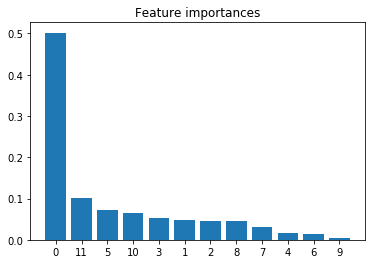

In [82]:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]
from matplotlib.axes import Axes
# Print the feature ranking
print("Feature ranking:")

for f in range(predictors.shape[1]):
    print("%d. feature: '%s' %d  (%f)" % (f + 1, predictors.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
axes = plt.figure().add_subplot(111)
# plt.figure()
plt.title("Feature importances")
plt.bar(range(predictors.shape[1]), importances[indices],
        align="center")
plt.xticks(range(predictors.shape[1]), indices)
# plt.xlim([-1, predictors.shape[1]])
# axes.set_xticklabels(labels=predictors.columns[indices])
plt.show()

In [64]:
importances[indices]

array([ 0.50182323,  0.1003645 ,  0.07305794,  0.06556579,  0.05249487,
        0.04775151,  0.04590055,  0.04574926,  0.03208166,  0.01767035,
        0.01318396,  0.00435638])

# List of scores
train score, test score

1. max_depth=88

    0.292800147024, 
    0.525181572505
2. n_estimators=620.

    0.285742467035
    0.5128587099
3. n_estimators=620 & max_depth=20 (1,50)

    0.32359277972
    0.512686141737
4. n_estimators=620 & max_depth=20 (1,100)

    0.306598840111
    0.512457524407
5. n_estimators=620, max_depth=20 not randomSearchCV

    0.324493028948
    0.512699991511
6. 
